## Import modules


Code voor oonderzoek thermische expansie coefficient van onbekend metaal met de Michelson - Inteferometer. 
- Auteurs: Jasper Nierse / Feia Schipper
- Student ID: 15201023 / 15677850
- Datum: 20/03/25
- Begeleider: Anna van Dun
- NSP1: Natuur en Sterrenkunde, UvA

In [77]:
# import modules
import numpy as np
import matplotlib.pyplot as plt

from lmfit import models

## Invoeren lijsten met data

Verzamelde data zal in de vorm zijn:
    [Delta] N = N_0 - [N'] waar [N'] de gemeten waarde is uit de inteferro meter bij elke voor de hoeveelheid fringes.

    [theta] = de afgelezen waarde voor de nieuwe hoek die is ontstaan uit na verhogen van de temperatuur.

    [Delta T] = [gemeten temp] - kamertemp  

#### Berekenen brekingsindex van het glas

Brekingsindex wordt berekend uit de dikte van het glas, de invallen hoek van de laser en afgelezen fringes per meting.

Er was geen tijd voor de brekingsindex te bepalen.\
De gevonden waarden na het experiment zijn:

In [78]:
# # Functie om brekingsindex te berekenen
# def brekingsindex():

#     gemeten_hoeken = [invullen]
#     gemeten_fringes = [invullen]
#     dikte = 0.0144 #[m]
#     golflengte = te meten # in [m]

#     lijst_brekingsindex = []
#     teller = 0

#     for i in gemeten_hoeken:
#         teller_n = (2* dikte - gemeten_fringes[teller] * golflengte) * (1 - np.cos(i))
#         noemer_n = 2 * dikte * (1 - np.cos(i)) - gemeten_fringes[teller] * golflengte

#         n = teller_n / noemer_n

#         lijst_brekingsindex.append(n)
#         teller  += 1

#     return lijst_brekingsindex

Uit deze waarde van n nog een fit maken om een definitieve waarde voor n te vinden die in de volgende formules als constante wordt genomen. De fit zal lineair zijn uit wet van Snell's. 

#### Meting 1
Lijsten met gemeten data van onbekend metaal 1:

Er wordt gemeten op vooraf bepaalde tijdsintervallen Delta_t, waarbij het verschil in fringes bepaald word uit de gemeten fringes bij de corresponderende gemeten temperatuur ten opzichte van de T_0 temperatuur in [K]. Ofwel hoeveel N geteld tot een bepaalde tijdswaarde. 

In [79]:
lijst_N_gemeten_1 = [0.25, 0.5, 0.75, 1, 1.5, 1.75, 2.5, 2.5, 3.25, 3.4, 4, 4, 4.75]  #[fringes]
lijst_delta_T_1 = [ 1.9, 2.6, 4.9, 6.8, 8.9, 10.5, 12.4, 14.0, 15.8, 17.2, 19.1, 19.9, 21.8] # Verschil in [K]
hoek_gemeten_1 = 31.6 #[hoek graden] Later wordt het omgereken naar radialen
L_0_gemeten_1 = 0.167 # [m] lengte metaal bij Delta_T = 0


#### Meting 2
Lijsten met gemeten data van onbekend metaal 2:

In [80]:
lijst_N_gemeten_2 = [0.25, 0.75, 1, 1.35, 1.75, 2.2, 2.6, 2.9, 3.25, 3.7, 4, 4.2, 4.6]  #[fringes]
lijst_delta_T_2 = [0.3, 1.3, 2.3, 3.2, 4.3, 5.2, 6.3, 7.5, 8.3, 9.1, 10, 10.9, 11.7] #Verschil in [K]
hoek_gemeten_2 = 31.6 #[hoek graden] Later wordt het omgereken naar radialen
L_0_gemeten_2 = 0.176  # [m] lengte metaal bij Delta_T = 0

### Fitten van de gevonden Delta_N en Delta_T
 om de richtingscoeff te vinden om alpha te berekenen. 

 Delta_N = a * Delta_T

Voor onbekend metaal 1:

In [81]:
# Fitten van de waarde voor a voor metaal 1.

lijst_Delta_T_metaal_1 = lijst_delta_T_1
# Fout op N, [yerr]
delta_N = 0.2
fout_N_1 = []
teller = 0

for i in lijst_N_gemeten_1:
    if teller < 2:
        fout = i * 0.5
    else:
        fout = i * delta_N
    fout_N_1.append(fout)
    teller += 1
fout_N_1 = [0.5, 0.5, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2]
# Fout op T, [xerr]
delta_T = 0.2
fout_T_1 = []
for j in lijst_Delta_T_metaal_1:
    fout = j * delta_T
    fout_T_1.append(fout)

Voor onbekend metaal 2:

In [82]:
# Fitten van de waarde voor a voor metaal 2.

lijst_Delta_T_metaal_2 = lijst_delta_T_2
# Fout op N, [yerr]
delta_N = 0.2
fout_N_2 = []
teller = 0

for i in lijst_N_gemeten_2:
    if teller < 2:              
        fout = i * 0.5          # Coorectie voor slechte eerste waarden.
    else:
        fout = i * delta_N
    fout_N_2.append(fout)
    teller += 1

fout_N_2 = [0.5, 0.5, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2]

# Fout op T, [xerr]
delta_T = 0.2
fout_T_2 = []
for j in lijst_Delta_T_metaal_2:
    fout = j * delta_T
    fout_T_2.append(fout)

#### Plot en fit van de gemeten waardes, Delta_N en Delta_T van onbekend metaal 1

(np.float64(-0.51), np.float64(5.21))

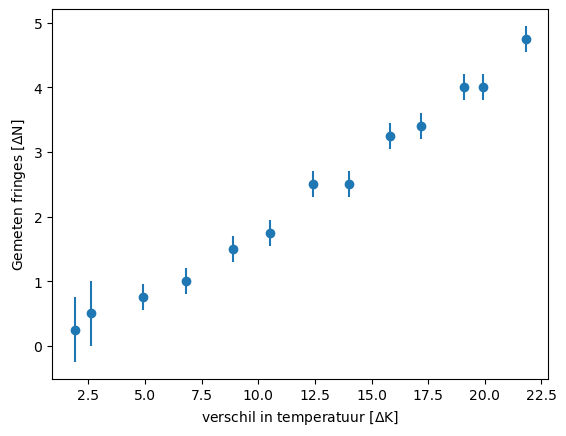

In [83]:
# Plot van de gemeten waardes bij meting 1
plt.figure()

plt.errorbar(lijst_Delta_T_metaal_1, lijst_N_gemeten_1, yerr = fout_N_1, fmt='o')
plt.xlabel(r"verschil in temperatuur [$\Delta$K]")
plt.ylabel(r"Gemeten fringes [$\Delta$N]")
plt.xlim()
plt.ylim()

Defineren fit waardes voor metaal 1:

Plot van fit van meting onbekend metaal 1:

(0.0, 5.21)

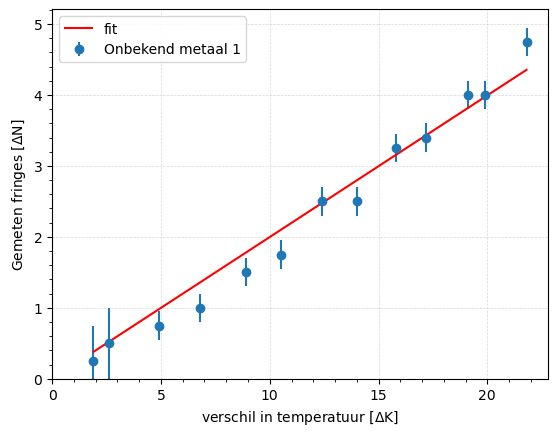

In [85]:
# create new figure
plt.figure()

# create errorbar plot with fit
# data displayed as circles
plt.errorbar(x_1, y_1, yerr = y_err_1, fmt='o', label = 'Onbekend metaal 1')
plt.plot(x_1, fit_result_meting_1.best_fit, 'r-', label = 'fit')
plt.xlabel(r"verschil in temperatuur [$\Delta$K]")
plt.ylabel(r"Gemeten fringes [$\Delta$N]")
plt.legend(loc="upper left")
plt.minorticks_on()
plt.tick_params(which='minor', length=2)
plt.grid(linestyle = '--', linewidth = 0.5, alpha = 0.5)
plt.xlim(0)
plt.ylim(0)
#plt.savefig("")

Opvragen fit gegevens meting onbekend metaal 1:

In [86]:
# print fit report
print(fit_result_meting_1.fit_report())

[[Model]]
    Model(fit_function)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 5
    # data points      = 13
    # variables        = 1
    chi-square         = 16.7745119
    reduced chi-square = 1.39787599
    Akaike info crit   = 5.31384594
    Bayesian info crit = 5.87879530
    R-squared          = 0.97408573
[[Variables]]
    p1:  0.19972004 +/- 0.00483418 (2.42%) (init = 0.23)


#### Plot en fit van de gemeten waardes, Delta_N en Delta_T van onbekend metaal 2:

(np.float64(-0.5025), np.float64(5.0525))

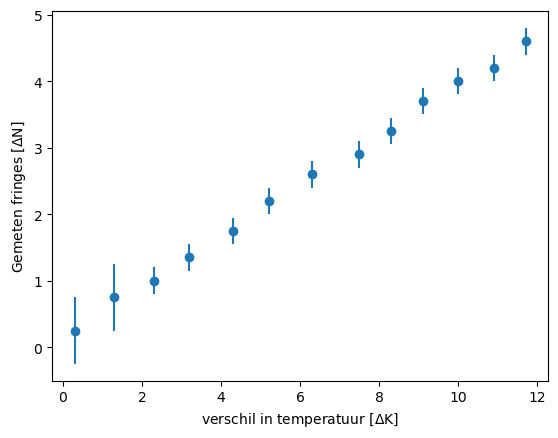

In [87]:
# Plot van de gemeten waardes bij metaal 2
plt.figure()

plt.errorbar(lijst_delta_T_2, lijst_N_gemeten_2, yerr = fout_N_2, fmt='o')
plt.xlabel(r"verschil in temperatuur [$\Delta$K]")
plt.ylabel(r"Gemeten fringes [$\Delta$N]")
plt.xlim()
plt.ylim()

Defineren fit waardes voor metaal 2:

In [88]:
# define fit function with parameters p1 en p2, waar y Delta_N en x Delta_T.

x_2 = lijst_Delta_T_metaal_2
y_2 = lijst_N_gemeten_2
x_err_2 = fout_T_2
y_err_2 = fout_N_2

def fit_function_2 (x, p1_2):
    y = p1_2 * x 
    return y


# create model of fit function
mod_MI_2 = models.Model(fit_function_2)

# initialize array and calculate weights
y_err_array_2 = np.array(y_err_2)
y_inv_err_2 = 1 / y_err_array_2


# use model to fit
fit_result_meting_2 = mod_MI_2.fit(y_2, x = x_2, weights = y_inv_err_2, p1_2 = 0.375)

Plot van fit van meting onbekend metaal 1:

(0.0, 5.0525)

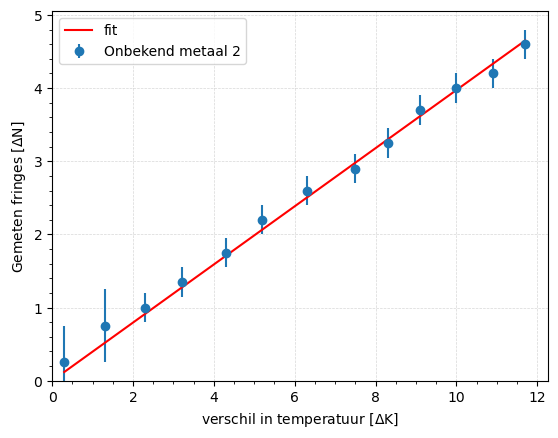

In [89]:
# create new figure
plt.figure()

# create errorbar plot with fit
# data displayed as circles
plt.errorbar(x_2, y_2, yerr = y_err_2, fmt='o', label = 'Onbekend metaal 2')
plt.plot(x_2, fit_result_meting_2.best_fit, 'r-', label = 'fit')
plt.xlabel(r"verschil in temperatuur [$\Delta$K]")
plt.ylabel(r"Gemeten fringes [$\Delta$N]")
plt.legend(loc="upper left")
plt.minorticks_on()
plt.tick_params(which='minor', length=2)
plt.grid(linestyle = '--', linewidth = 0.5, alpha = 0.5)
plt.xlim(0)
plt.ylim(0)
#plt.savefig("")

Opvragen fit gegevens meting onbekend metaal 2:

In [90]:
# print fit report
print(fit_result_meting_2.fit_report())

[[Model]]
    Model(fit_function_2)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 5
    # data points      = 13
    # variables        = 1
    chi-square         = 2.25205030
    reduced chi-square = 0.18767086
    Akaike info crit   = -20.7904081
    Bayesian info crit = -20.2254587
    R-squared          = 0.99375981
[[Variables]]
    p1_2:  0.39737331 +/- 0.00336063 (0.85%) (init = 0.375)


Plot van fits van metaal 1 en 2

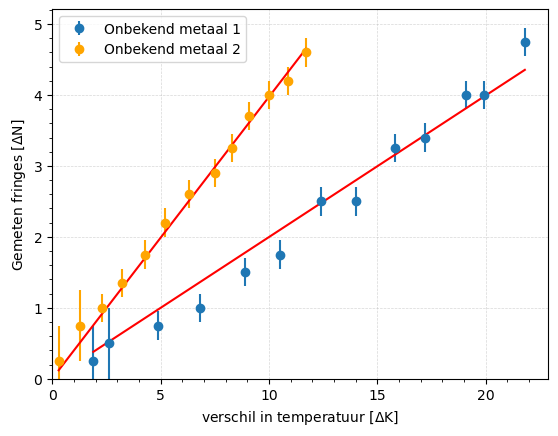

In [91]:
plt.figure()

plt.errorbar(x_1, y_1, yerr = y_err_1, fmt='o', label = 'Onbekend metaal 1')
plt.plot(x_1, fit_result_meting_1.best_fit, 'r-')
plt.errorbar(x_2, y_2, yerr = y_err_2, fmt='o', color = "orange", label = 'Onbekend metaal 2')
plt.plot(x_2, fit_result_meting_2.best_fit, 'r-')
plt.xlabel(r"verschil in temperatuur [$\Delta$K]")
plt.ylabel(r"Gemeten fringes [$\Delta$N]")
plt.legend(loc="upper left")
plt.minorticks_on()
plt.tick_params(which='minor', length=2)
plt.grid(linestyle = '--', linewidth = 0.5, alpha = 0.5)
plt.xlim(0)
plt.ylim(0)
plt.savefig("Plot metaal 1 en 2 met fit.")

### Berekenen van Alpha uit a: 

In [92]:
# Functie berekend de thermische expansie coeff uit ingevulde waarde. De constante zijn hetzelfde bij de twee metingen,
# met a de waarde van de richtingscoeff uit de fit van (Delta_N / Delta_T).
def thermische_expansie_coeffiecient(a, lengte_0, gemeten_hoek_graden):

    # Constante waardes
    arm_lengte = 0.158 #[m] # center draai schijf tot contact punt metaal
    brekingsindex_glas = 1.55
    dikte_glas = 0.0145 # [m]
    golflengte_laser = 632.8*10**(-9) # Golflengte van laser in [m]
    gemeten_hoek_rad = gemeten_hoek_graden * (np.pi / 180)

    alpha_teller = a * golflengte_laser * arm_lengte * (brekingsindex_glas - 1 + np.cos(gemeten_hoek_rad))**2
    alpha_noemer = 2 * brekingsindex_glas * dikte_glas * np.sin(gemeten_hoek_rad) * (brekingsindex_glas - 1) * lengte_0
    alpha = alpha_teller / alpha_noemer

    return alpha 



### Fouten van beide metalen.

Voor de te bepalen fout op de expansie coeffiecient zijn er fouten op:

- Gemeten fringes Delta_N, deze komt niet terug in de berkenening van alpha, omdat deze is meegenomen in de waarde voor a.
- Gemeten temperatuur en hierna Delta_T van de digitale termometer, deze komt niet terug in de berkenening van alpha, omdat deze is meegenomen in de waarde voor a.


- Arm lengte R van het midden van de draaitafel tot het stuk metaal.
- Brekingsindex n van het glas op de draaitafel.
- Opgemeten hoek theta van de draaitafel in start toestand.
- Lengte van onbekende metaal op L_0 bij Delta_T = 0
- Dikte van het het glas d opgemeten met digitale calipers.
- De relatie tussen Delta_N en Delta_T, a. De fout hierop wordt bepaald uit de gemaakte fit.

### Berekenen van fouten
Voor brekingsindex

In [93]:
# # Fouten op directe te meten waardes:
# delta_R = waarde # in [m]
# delta_L_0 = waarde # in [m]
# delta_d = waarde # in [m]
# delta_N = waarde # fout op fringes  

# #---------------------------------------------------<Functies berekenen fouten>-------------------------------------------------

# #-------------------------------------------------------<Fout brekingsindex>-------------------------------------------------
# # Fouten op omgerekende waardes:
# # Fout op temperatuur       
# def fout_temperatuur(gemeten_T_0 ,gemeten_T_eind):

#     lijst_delta_T = []
#     fout_handleiding = waarde invullen
#     teller = 0
#     for i in gemeten_T_eind:
#         fout_T = (i - gemeten_T_0) * fout_handleiding
#         lijst_delta_T.append(fout_T)
#         teller += 1

#     return lijst_delta_T


# # Fout op hoek theta
# def fout_hoeken(gemeten_theta):

#     fout_draai_tafel = waarde invullen #[graden]
#     lijst_delta_theta = []

#     for i in gemeten_theta:
#         fout_theta = i * fout_draai_tafel
#         lijst_delta_theta.append(fout_theta)

#     return lijst_delta_theta


# # fout brekingsindex n
# def fout_brekingsindex(gemeten_N, gemeten_theta):
    
#     dikte = 0.0144 #[m]
#     golflengte = te meten # in [m]

#     delta_d = invullen
#     delta_N = invullen
#     delta_theta = fout_hoeken(gemeten_theta)

#     # Fouten berekenen voor elk component in formule brekingsindex
#     fout_n_d = []
#     teller = 0

#     # Op de dikte
#     for i in gemeten_N:

#         der_d = (-1) * (2 * golflengte * i * np.cos(np.degrees(gemeten_theta[teller]))(1 - np.cos(np.degrees(gemeten_theta[teller])))) / ((2 * dikte (1 - np.cos(np.degrees(gemeten_theta[teller])) - golflengte * i))**2)
#         fout_d = der_d * delta_d

#         fout_n_d.append(fout_d)
#         teller += 1

#     # Op de fringes
#     fout_n_N = []
#     teller = 0

#     for j in gemeten_N:

#         der_N = (2 * golflengte * dikte * np.cos(np.degrees(gemeten_theta[teller]))(1 - np.cos(np.degrees(gemeten_theta[teller])))) / ((2 * dikte * (1 - np.cos(np.degrees(gemeten_theta[teller]))) - j * golflengte)**2)
#         fout_N = der_N * delta_N

#         fout_n_N.append(fout_N)
#         teller += 1

#     # Op de gemeten hoek
#     fout_n_theta = []
#     teller = 0

#     for k in gemeten_N:

#         der_theta = (-1)(k * golflengte * np.sin(np.degrees(gemeten_theta[teller])) * (2 * dikte - k * golflengte))/((2 * dikte * (1 - np.cos(np.degrees(gemeten_theta[teller]))) - k * golflengte)**2)
#         fout_theta = der_theta * delta_theta[teller]

#         fout_n_theta.append(fout_theta)
#         teller += 1

#     # Fout op de brekingsindex:

#     fout_n = []
#     teller = 0

#     for n in fout_n_d:
#         fout = np.sqrt((n)**2 + (fout_n_N[teller])**2 + (fout_n_theta[teller])**2)
#         fout_n.append(fout)
#         teller += 1
    
#     return fout_n



Voor Alpha

In [94]:

#----------------------------------------------------------<Fout berekenen op Alpha met standaard foutenpropegatie>---------------

# Fout op de expansie coeff, geeft een waarde terug voor delta_alpha.
def fout_alpha(a, delta_a, L_0, gemeten_theta_degrees):

    gemeten_theta_rad = gemeten_theta_degrees * (np.pi / 180)
    # Constante waardes voor in formule fouten propegatie
    R = 0.158 # center draai schijf tot contact punt metaal
    n = 1.55
    d = 0.0145 # [m]
    golflengte_laser = 632.8*10**(-9) # Golflengte van laser in [m]

    # Constante fouten voor in fouten propegatie
    delta_R = 5*10**(-4)
    delta_L_0 = 1*10**(-3)
    delta_d = 3*10**(-5)
    delta_theta = 1/60 * (np.pi / 180)
    delta_n = 0.15 #waarde nog te bepalen uit fout uit brekingsindex, uit fit moet delta_n komen. 
                   #Hier nu gemiddelde fout genomen op bekende waardes van n bij verschillende soorten glas.
                   # Hier was: 1.40 <= n <= 1.70, met gemiddeld verschil van 0.15

    #----------------------------------<De componenten van de fout op Alpha worden hier berekend:>-----------------------------------

    # Fout op Arm lengte
    derr_R = (a * golflengte_laser * (np.cos(gemeten_theta_rad) + n -1)**2) / (L_0 * 2 * n * d * np.sin(gemeten_theta_rad) * (n - 1))
    fout_alpha_R = derr_R * delta_R

    # Fout op brekingsindex 
    derr_n = (a * golflengte_laser * R * (-2 * n**2 * np.cos(gemeten_theta_rad) + n**2 - 2 * n * (np.cos(gemeten_theta_rad))**2 + 4 * n * np.cos(gemeten_theta_rad) - 2 * n + (np.cos(gemeten_theta_rad))**2 - 2 * np.cos(gemeten_theta_rad) + 1)) / (L_0 * 2 * n**2 * d * np.sin(gemeten_theta_rad) * (n - 1)**2)
    fout_alpha_n = derr_n * delta_n

    # Fout op gemeten hoek
    derr_theta = (a * golflengte_laser * R * ( -2 * (np.sin(gemeten_theta_rad))**2 * (n - 1 + np.cos(gemeten_theta_rad)) - np.cos(gemeten_theta_rad) * (n - 1 + np.cos(gemeten_theta_rad))**2)) / (L_0 * 2 * n * d * (np.sin(gemeten_theta_rad))**2 * (n - 1))
    fout_alpha_theta = derr_theta * delta_theta

    # Fout op L_0
    derr_L_0 = (-a * golflengte_laser * R * (n - 1 + np.cos(gemeten_theta_rad))**2) / (2 * n * d * (L_0)* 2 * np.sin(gemeten_theta_rad) * (n - 1))
    fout_alpha_L_0 = derr_L_0 * delta_L_0

    # Fout op dikte glas
    derr_d = (-a * golflengte_laser * R * (n - 1 + np.cos(gemeten_theta_rad))**2) / (2 * L_0 * d**2 * np.sin(gemeten_theta_rad) * (n - 1))
    fout_alpha_d = derr_d * delta_d

    # Fout op waarde a
    derr_a = (golflengte_laser * R * (np.cos(gemeten_theta_rad) + n - 1)**2) / (L_0 * 2 * n * d * np.sin(gemeten_theta_rad) * (n - 1))
    fout_alpha_a = derr_a * delta_a

    # ---------------------------------------<Totale fout op alpha>-------------------------------------------------------------

    fout_alpha = np.sqrt((fout_alpha_R)**2 + (fout_alpha_n)**2 + (fout_alpha_theta)**2 +  (fout_alpha_L_0)**2 + (fout_alpha_d)**2 + (fout_alpha_a)**2)
    
    return fout_alpha

### Uitwerking en geven resultaten

#### Thermische expansie coeffiecient van onbekend metaal 1:

In [95]:
# Waarden
print(f"De thermische expansie coeffiecient van onbekend metaal 1 is: {thermische_expansie_coeffiecient(0.19972004  , L_0_gemeten_1, hoek_gemeten_1)} 1/K")
print(f"De fout hierop is: {fout_alpha(0.19972004 , 0.00483418 , L_0_gemeten_1, hoek_gemeten_1)} 1/K")

De thermische expansie coeffiecient van onbekend metaal 1 is: 1.8136086406266345e-05 1/K
De fout hierop is: 2.854970843350845e-06 1/K


#### Thermische expansie coeffiecient van onbekend metaal 2:

In [96]:
# Waarden
print(f"De thermische expansie coeffiecient van onbekend metaal 2 is: {thermische_expansie_coeffiecient( 0.39737331 , L_0_gemeten_2, hoek_gemeten_2)} 1/K")
print(f"De fout hierop is: {fout_alpha( 0.39737331 , 0.00336063  , L_0_gemeten_2, hoek_gemeten_2)} 1/K")

De thermische expansie coeffiecient van onbekend metaal 2 is: 3.423926467133974e-05 1/K
De fout hierop is: 5.333692978225248e-06 1/K


#### Vergelijken met bekende waardes voor $\alpha$ uit de literatuur.

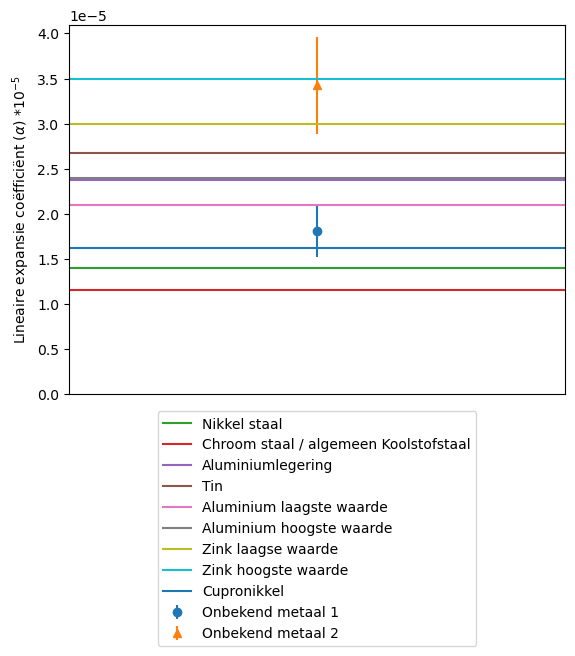

In [98]:
x_1 = [6]
y_plot_1 = [thermische_expansie_coeffiecient(0.19972004 , L_0_gemeten_1, hoek_gemeten_1)]
y_error_1 = [fout_alpha(0.19972004 ,  0.00709746 , L_0_gemeten_1, hoek_gemeten_1)]

x_2 = [6]
y_plot_2 = [thermische_expansie_coeffiecient(  0.39737331, L_0_gemeten_2, hoek_gemeten_2)]
y_error_2 = [fout_alpha(  0.39737331, 0.00336063  , L_0_gemeten_2, hoek_gemeten_2)]

x_nikkel_staal = [0, 13]
y_nikkel_staal = [14*10**(-6), 14*10**(-6)]

x_chroom_staal = [0, 13]
y_chroom_staal = [11.5*10**(-6), 11.5*10**(-6)]

x_Aluminiumlegering = [0, 13]
y_Aluminiumlegering = [	23.8*10**(-6), 23.8*10**(-6)]

x_tin = [0, 13]
y_tin = [26.7*10**(-6), 26.7*10**(-6)]

x_aluminium_laag = [0,16]
x_aluminium_hoog = [0,16]
y_aluminium_laag = [21*10**(-6),21*10**(-6)]
y_aluminium_hoog = [24*10**(-6),24*10**(-6)]

x_zink_laag = [0,13]
x_zink_hoog = [0,13]
y_zink_laag = [30*10**(-6), 30*10**(-6)]
y_zink_hoog = [35*10**(-6), 35*10**(-6)]

x_cupronikkel = [0, 13]
y_cupronikkel = [16.2*10**(-6), 16.2*10**(-6)]

# Gebruikte bron voor de bekende expansie coeficienten:
# - https://www.engineeringtoolbox.com/linear-expansion-coefficients-d_95.html
# - https://www.machinemfg.com/nl/thermal-expansion-formulas-coefficients-for-metals/
# - https://tosec.nl/nl/wiki/lineaire-uitzettingscoefficient/

plt.figure()

plt.errorbar(x_1, y_plot_1, y_error_1,  fmt='o', label= 'Onbekend metaal 1')
plt.errorbar(x_2, y_plot_2, y_error_2,  fmt='^', label= 'Onbekend metaal 2')
plt.plot(x_nikkel_staal, y_nikkel_staal, '-', label = "Nikkel staal")
plt.plot(x_chroom_staal, y_chroom_staal, '-', label = "Chroom staal / algemeen Koolstofstaal")
plt.plot(x_Aluminiumlegering, y_Aluminiumlegering, '-', label = "Aluminiumlegering")
plt.plot(x_tin, y_tin, '-', label = "Tin")
plt.plot(x_aluminium_laag, y_aluminium_laag, '-', label = "Aluminium laagste waarde")
plt.plot(x_aluminium_hoog, y_aluminium_hoog, '-', label = "Aluminium hoogste waarde")
plt.plot(x_zink_laag, y_zink_laag, '-', label = "Zink laagse waarde")
plt.plot(x_zink_hoog, y_zink_hoog, '-', label = "Zink hoogste waarde")
plt.plot(x_cupronikkel, y_cupronikkel, '-', label = "Cupronikkel")

plt.ylabel(r"Lineaire expansie coëfficiënt ($\alpha$) $*10^{-5}$")
plt.tick_params(
    axis='x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom=False,      # ticks along the bottom edge are off
    top=False,         # ticks along the top edge are off
    labelbottom=False) # labels along the bottom edge are off

plt.legend(bbox_to_anchor =(0.5,-0.70), loc='lower center')
plt.xlim(0, 12)
plt.ylim(0)
#plt.title("Expansie coeffiecient van gemeten onbekende metalen vergeleken met bekende waarde voor verschillende metalen.")
plt.savefig('Vergelijking bekende metalen met gemeten onbekende.png', bbox_inches = 'tight')



